In [1]:
import sys
import os
# Add the directory containing 'thesis_utils.py' to the system path
sys.path.append(os.path.abspath('..'))  # If 'thesis_utils.py' is one level up
# Or use this if it's in the same directory as the notebook:
# sys.path.append(os.getcwd())
# os.environ["JULIA_NUM_THREADS"] = "8" 
os.environ["PYTHON_JULIACALL_HANDLE_SIGNALS"] = "yes"
os.environ["PYTHON_JULIACALL_THREADS"] = "auto"
os.environ["PYTHON_JULIACALL_OPTLEVEL"] = "3"
from pysr import PySRRegressor
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

from thesis_utils import *

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [ ]:
import importlib
import thesis_utils  # or whatever your module is called

importlib.reload(thesis_utils)

from thesis_utils import *

In [2]:
data = pd.read_csv("data/real_estate_valuation_cleaned.csv")

In [3]:
# Generate the profiling report
profile_full = ProfileReport(data, title="Real Estate", explorative=True)

# Display the report in the notebook
profile_full.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:00<00:00, 48770.98it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# variable assignment according to correlation structure
independents_lst = ['X2 distance MRT station', 'X3 number convenience stores', 'X4 lat']
dependent_var = 'X6 price'
X = data[independents_lst].to_numpy()
y = data[dependent_var].to_numpy()

In [5]:
sr_model = PySRRegressor(
        niterations=1024,  # Number of iterations to search for equations
        binary_operators=["+", "-", "*", "/"],
        unary_operators=["log", "abs", "sqrt"],
        maxdepth=10,
        elementwise_loss="loss(x, y) = (x - y)^2",  # Define loss function (mean squared error)
        verbosity=0,
        maxsize=50
    )
sr_model.fit(X, y)

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          37.979763   
	1         0.111797                                     x1 + 33.885647   
	2         0.139257                                 66.5216 - sqrt(x0)   
	3         0.298340                         sqrt(32106.508 / sqrt(x0))   
	4         0.113716                  (log(x0) * -8.923169) + 95.014656   
	5         0.025123            73.59382 - (sqrt(sqrt(x0)) * 6.9286633)   
	6         0.012385     (log(x0 + 161.7844) * -11.901981) + 118.116516   
	7         0.002874  (log(log(x0 + 269.48947)) * -94.595535) + 219....   
	8         0.084141    (((x2 * x2) - log(x0)) * 6.956493) + -4254.5986   
	9         0.005047  ((x2 - log(x0)) * (-396.66263 - (x2 * -16.1852...   
	10        0.002315  ((x2 - log(x0 + 26.787561)) * (-366.31628 - (x...   
	11        0.000088  ((-383.57318 - (x2 * -15.686443)) * (x2 - log(...   
	12        0.016388  abs((x2 + ((-451.13498 - (x2 * -18.393572)) * ...   
	13        0.020401  ((x2 * ((log(x0) - x2) * -0.3478133)) + (x2 / ...   
	14        0.007081  ((sqrt(x0) / (x0 - (x2 * 10.1047735))) + (x2 *...   
	15        0.001829  ((x2 / (x0 - (x2 * 10.09805))) - 125.07417) + ...   
	16        0.005623  (sqrt(x0) / (x0 - (x2 * 10.1047735))) + (((log...   
	17  >>>>  0.120509  (((log(x0) - x2) * (((x2 * x2) * -0.23817605) ...   
	18        0.001344  (sqrt(x0) / (x0 - (x2 * 10.104745))) + (((((x2...   
	19        0.003852  (((-139.5996 - ((x2 * x2) * -0.23352633)) * (x...   
	20        0.001805  abs(x1 + (12.784425 / (x0 - (x2 * 10.106874)))...   
	21        0.006899  ((x1 / 1.2014415) + (((-139.50067 - ((x2 * -0....   
	22        0.001330  (((-139.50067 - (x2 * (x2 * -0.23357639))) * (...   
	23        0.007018  (((-139.55917 - ((x2 * x2) * -0.2340547)) * (x...   
	24        0.000516  ((x2 - log(x0)) * (-139.49165 - ((x2 * x2) * -...   
	25        0.001516  ((x2 - log(x1 + x0)) * (-139.55917 - (x2 * (x2...   
	26        0.040171  (((x2 / (x2 + (x0 - (x2 * 11.100554)))) - 79.6...   
	27        0.015791  ((x2 - log(x0)) * (-141.39935 - ((x2 * x2) * -...   
	28        0.026497  (((x2 / ((x0 + x2) - (x2 * 11.10045))) + ((x2 ...   
	29        0.015988  abs((x2 / ((x0 + x2) - (x2 * 11.100444))) + (x...   
	30        0.005104  ((x2 / abs((x2 * 11.7818165) - x0)) + (((-141....   
	31        0.012736  ((((80.182785 / (((x1 * x0) + 2.435969) - (x2 ...   
	32        0.010266  (x1 * ((x1 / ((x2 * 11.787747) - x0)) + ((80.1...   
	33        0.027625  (x1 * (abs(x1 / ((x2 * 11.78845) - x0)) + ((80...   
	34        0.000146  ((x1 * (abs(x1 / ((x2 * 11.78845) - x0)) + ((8...   
	35        0.001062  (x1 * ((0.34626848 + (x1 / abs((x2 * 11.793042...   
	36        0.001361  ((((abs(x2 * log(x0)) / (((x0 + 2.7740407) * x...   
	37        0.000257  (((-141.50894 - (x2 * (x2 * -0.2369703))) * (x...   
	38        0.000002  (((-141.50894 - ((x2 * x2) * -0.2369703)) * (x...   
	39        0.000289  (((-141.50945 - ((x2 * x2) * -0.23696199)) * (...   
	
	          loss  complexity  
	0   184.689240           1  
	1   147.684880           3  
	2   128.486510           4  
	3    95.343315           5  
	4    85.094955           6  
	5    82.983770           7  
	6    81.962360           8  
	7    81.727120           9  
	8    75.131890          10  
	9    74.377380          12  
	10   74.033870          14  
	11   74.020836          16  
	12   72.817700          17  
	13   71.347190          18  
	14   70.843790          19  
	15   70.714355          20  
	16   70.317825          21  
	17   62.334568          22  
	18   62.250840          23  
	19   62.011517          24  
	20   61.899660          25  
	21   61.474110          26  
	22   61.310753          28  
	23   60.881970          29  
	24   60.850563          30  
	25   60.758404          31  
	26   58.366028          32  
	27   57.451620          33  
	28   55.949290          34  
	29   55.061905          35  
	30  

In [6]:
# 20250502_120327_TPyClz
# Complexity 24
candidate_function = generate_candidate_function("(((-139.5996 - ((x2 * x2) * -0.23352633)) * (x2 - log(x0))) + ((11.814501 / (x0 - (x2 * 10.10737))) - 77.7033)) + x1")

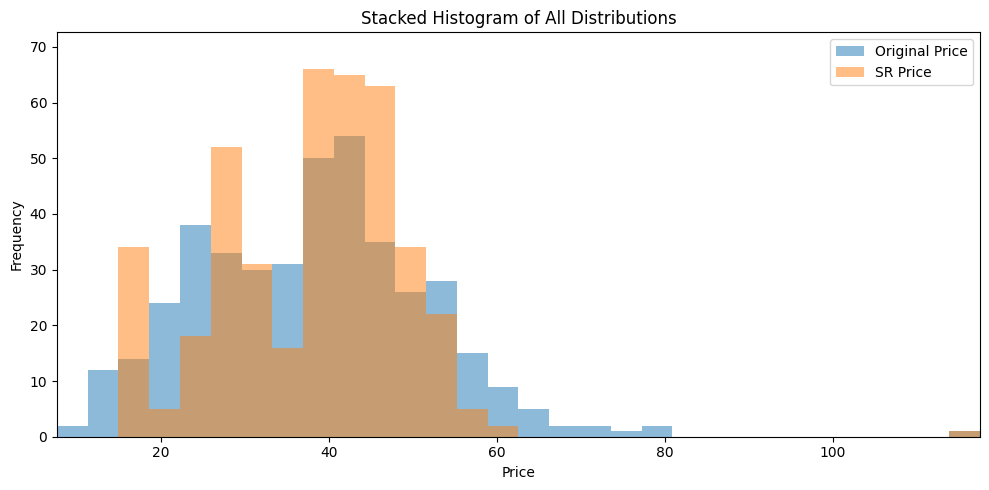

In [9]:
%matplotlib inline
y_sr = candidate_function(X)
plot_histograms([(y, 'Original Price', None), (y_sr, 'SR Price', None)], 'Price', stack=True, figsize_per_plot=(10, 5))

<Figure size 640x480 with 0 Axes>

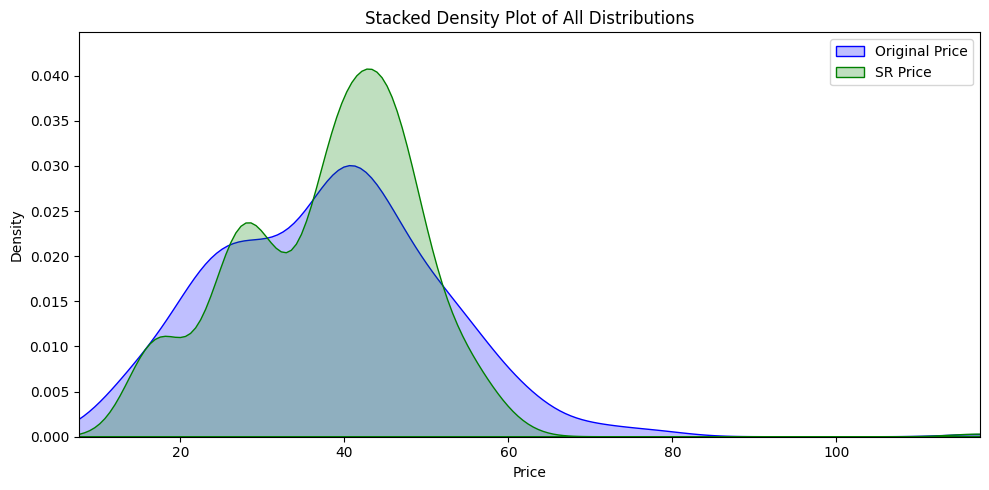

In [10]:
plot_densities([(y, 'Original Price', 'blue'), (y_sr, 'SR Price', 'green')], 'Price', stack=True, figsize_per_plot=(10, 5))

In [11]:
orig_residuals = y - y_sr

In [ ]:
y_corrected, best_amp, errors, _ = correct_predictions(y, y_sr, method='stratified', seed=42, clip_lower=0, clip_upper=None, original_residuals=None, tail_replace=True, lower_percentile=50)
# ignore error in orig_residuals after first run

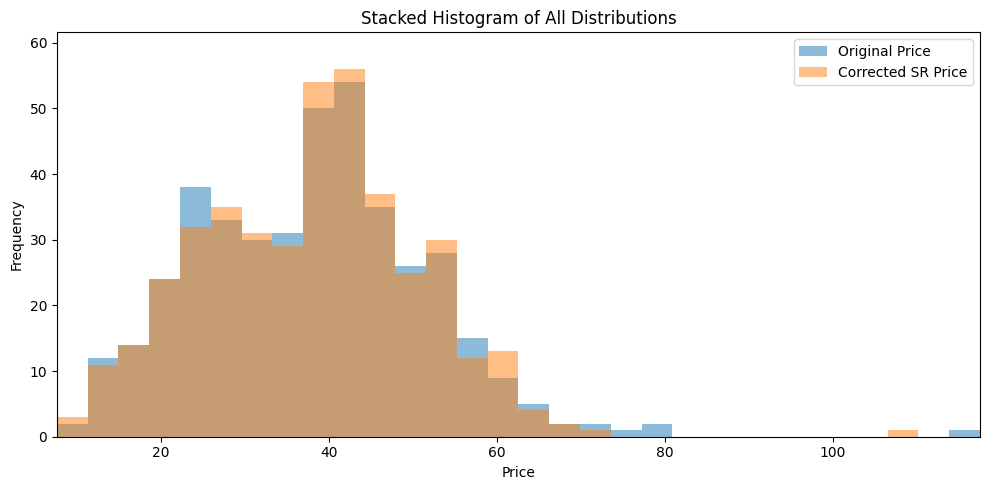

In [13]:
plot_histograms([(y, 'Original Price', None), (y_corrected, 'Corrected SR Price', None)], 'Price', stack=True, figsize_per_plot=(10, 5))

<Figure size 640x480 with 0 Axes>

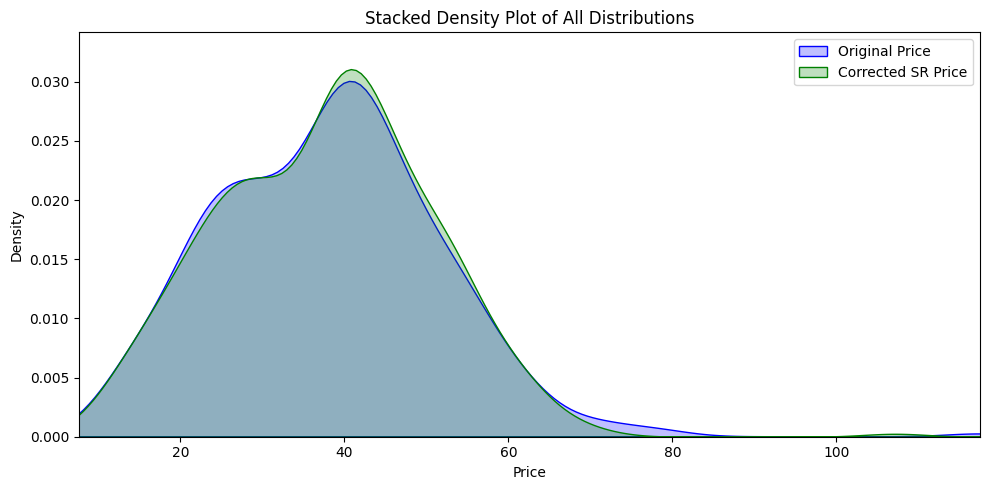

In [17]:
plot_densities([(y, 'Original Price', 'blue'), (y_corrected, 'Corrected SR Price', 'green')], 'Price', stack=True, figsize_per_plot=(10, 5))

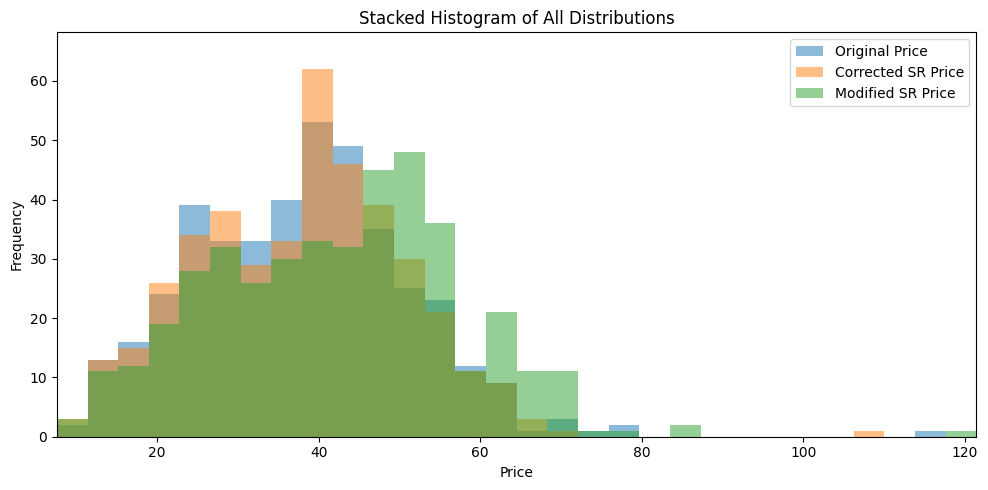

In [ ]:
mod_candidate_function = generate_candidate_function("(((-139.5996 - ((x2 * x2) * -0.23352633)) * (x2 - log(x0))) + ((11.814501 / (x0 - (x2 * 10.10737))) - 77.7033)) + 2*x1")
mod_y_sr = mod_candidate_function(X)
mod_y_corrected, best_amp, errors, _ = correct_predictions(y, mod_y_sr, method='stratified', amplification_factor=1.0, seed=42, clip_lower=0, clip_upper=None, original_residuals=orig_residuals, tail_replace=True, lower_percentile=50)
# ignore error in orig_residuals after first run
plot_histograms([(y, 'Original Price', None), (y_corrected, 'Corrected SR Price', None), (mod_y_corrected, 'Modified SR Price', None)], 'Price', stack=True, figsize_per_plot=(10, 5))